# **구글 마운트**

--------------------------------------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Imports**

--------------------------------------

In [ ]:
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from string import ascii_lowercase
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.ensemble import RandomForestClassifier

# **데이터 파일**

--------------------------------------

In [ ]:
train  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/sw중심대학 공동 AI 경진대회/train.csv')
test  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/sw중심대학 공동 AI 경진대회/test.csv')
index = test["index"]

# **EDA**

--------------------------------------

In [ ]:
#총 결측값 수
train.isna().sum().sum()

3703

In [ ]:
columns = train.columns.tolist()
columns

In [ ]:
Answers = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5',
             'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 
             'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 
             'Q16', 'Q17', 'Q18', 'Q19', 'Q20',]

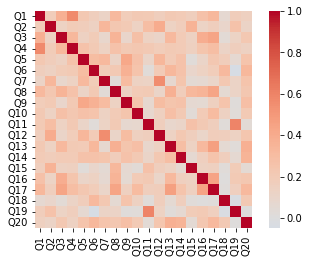

In [ ]:
correlations = train[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0) 

In [ ]:
eda_train = train.copy()

flipping_columns = ['Q3','Q7','Q10','Q16','Q4','Q11','Q17','Q9'] 
for flip in flipping_columns: 
    eda_train[flip] = 6 - eda_train[flip] 

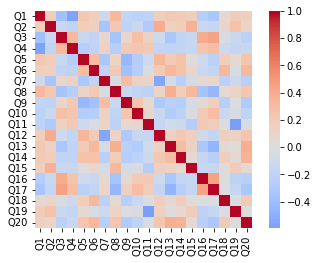

In [ ]:
correlations = eda_train[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0) 

In [ ]:
#답변 개수? 확인
for i in column :
  value_counts = train[i].value_counts()
  print(value_counts)

In [ ]:
age_counts = train['age'].value_counts()
age_counts.tail(60)

In [ ]:
family_counts = train['familysize'].value_counts()
family_counts.tail(60)

In [ ]:
train['age'].describe()

In [ ]:
train['familysize'].describe()

# **피처**
--------------------------------------

## 이상치 대체

In [ ]:
#age 이상치 대체
train[train['age']>100] = 0
test[test['age']>100] = 0

## 결측치 제거

In [ ]:
column = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5',
             'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 
             'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 
             'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
             'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26',
             'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4','TIPI5',
             'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10',
             'education', 'gender', 'engnat', 'hand', 'age', 'religion',
             'orientation', 'voted', 'married', 'familysize', 'ASD']

<평균>

In [ ]:
for i in column : #평균
  train[i] = train[i].fillna(train[train[i]>0][i].mean())
  test[i] = test[i].fillna(train[train[i]>0][i].mean())

In [ ]:
dataset = [train, test]

## TIPI 수정

In [ ]:
#TIPI피처 항목 나누기
for data in dataset:
  data['Ex'] = data['TIPI1']-data['TIPI6']
  data['Ag'] = data['TIPI7']-data['TIPI2']
  data['Con'] = data['TIPI3']-data['TIPI8']
  data['Es'] =data['TIPI9']-data['TIPI4']
  data['Op'] =data['TIPI5']-data['TIPI10']

## 마키아밸리 테스트 피처 수정

In [ ]:
#T/V/M 피처 생성
for data in dataset: 
  data['T'] = data['Q1']+data['Q2']+(6-data['Q3'])+(6-data['Q7'])+(6-data['Q10'])+data['Q12']+data['Q15']+(6-data['Q16'])
  data['V'] = (6-data['Q4'])+data['Q5']+data['Q8']+(6-data['Q11'])+data['Q13']+(6-data['Q17'])+data['Q20']
  data['M'] = (6-data['Q9'])+data['Q19']

## 딜레이 시간

In [ ]:
for data in dataset :
  data['introelapse'] = np.log1p(data['introelapse'])
  data['testelapse'] = np.log1p(data['testelapse'])
  data['surveyelapse'] = np.log1p(data['surveyelapse'])

0     9.649369
1    11.041897
2    11.609053
3    10.844276
4    13.229221
Name: delay, dtype: float64

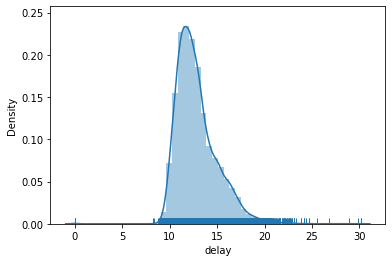

In [ ]:
# 'introelapse','testelapse','surveyelapse' 피처 delay로 합치기
times = ['introelapse','testelapse','surveyelapse']

for data in dataset:
  data['delay'] = data[times].sum(axis=1)

sns.distplot(train['delay'], rug = True)
train['delay'].head()

In [ ]:
# 'introelapse','testelapse','surveyelapse' 피처 제거
for data in dataset:
  data.drop(times, axis=1, inplace = True)

## 필요 없는 피처 제거

In [ ]:
delete = ['VCL16','VCL4','VCL10','VCL15','VCL1']
for data in dataset:
  data.drop(delete, axis=1, inplace = True)

# **모델링**

--------------------------------------

In [ ]:
train = train.drop(['index', 'country'],axis = 1) 
test =test.drop(['index', 'country'],axis = 1)

In [ ]:
train_x=train.drop(['nerdiness'], axis=1)
train_y=train['nerdiness']

In [ ]:
forest = forest = RandomForestClassifier(n_estimators = 6000,
                                bootstrap = True,
                                min_samples_split=3,
                                n_jobs = -1,
                                )
forest.fit(train_x, train_y)

forest_pred = forest.predict(test)

# **제출 파일**

--------------------------------------

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/sw중심대학 공동 AI 경진대회/sample_submission.csv')
submission["nerdiness"] = forest_pred

submission.to_csv('/content/drive/MyDrive/Colab Notebooks/data/sw중심대학 공동 AI 경진대회/randomforest_결측+이상+delay.csv', index=False)